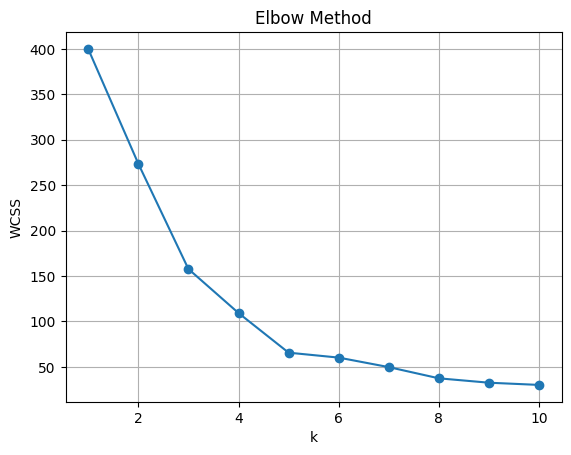

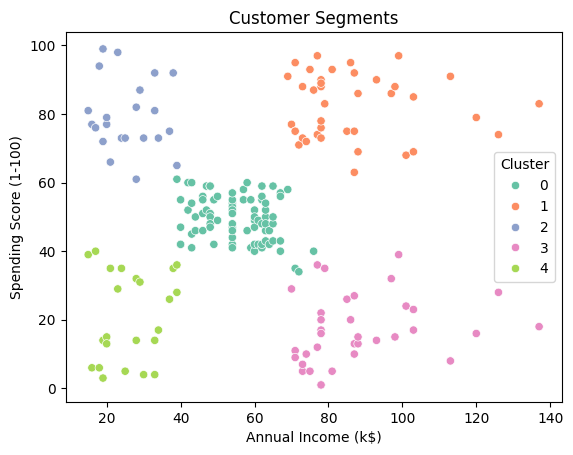

In [ ]:
import pandas as pd, matplotlib.pyplot as plt, seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

df = pd.read_csv('Mall_Customers.csv')
X  = df[['Annual Income (k$)', 'Spending Score (1-100)']]

X_scaled = StandardScaler().fit_transform(X)

# Elbow curve
wcss = [KMeans(n_clusters=k, random_state=42).fit(X_scaled).inertia_
        for k in range(1, 11)]
plt.plot(range(1, 11), wcss, marker='o')
plt.xlabel('k'); plt.ylabel('WCSS'); plt.title('Elbow Method'); plt.grid(); plt.show()

# Fit with chosen k (e.g. 5)
kmeans = KMeans(n_clusters=5, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)',
                hue='Cluster', palette='Set2').set_title('Customer Segments')
plt.show()
